<a href="https://colab.research.google.com/github/Evans-Sense/pet/blob/main/HousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd

In [37]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mrdaniilak/russia-real-estate-20182021")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'russia-real-estate-20182021' dataset.
Path to dataset files: /kaggle/input/russia-real-estate-20182021


In [38]:
import os
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/russia-real-estate-20182021/all_v2.csv


In [39]:
db = pd.read_csv('/root/.cache/kagglehub/datasets/mrdaniilak/russia-real-estate-20182021/versions/3/all_v2.csv')

db.head()

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.806,30.376,2661,1,8,10,3,82.600,10.800,1
1,8650000,2018-02-27,12:04:54,55.684,37.297,81,3,5,24,2,69.100,12.000,1
2,4000000,2018-02-28,15:44:00,56.295,44.062,2871,1,5,9,3,66.000,10.000,1
3,1850000,2018-03-01,11:24:52,44.996,39.075,2843,4,12,16,2,38.000,5.000,11
4,5450000,2018-03-01,17:42:43,55.919,37.985,81,3,13,14,2,60.000,10.000,1


In [40]:
db.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   price          5477006 non-null  int64  
 1   date           5477006 non-null  object 
 2   time           5477006 non-null  object 
 3   geo_lat        5477006 non-null  float64
 4   geo_lon        5477006 non-null  float64
 5   region         5477006 non-null  int64  
 6   building_type  5477006 non-null  int64  
 7   level          5477006 non-null  int64  
 8   levels         5477006 non-null  int64  
 9   rooms          5477006 non-null  int64  
 10  area           5477006 non-null  float64
 11  kitchen_area   5477006 non-null  float64
 12  object_type    5477006 non-null  int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 543.2+ MB


In [41]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
db.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,5477006.000,5477006.000,5477006.000,5477006.000,5477006.000,5477006.000,5477006.000,5477006.000,5477006.000,5477006.000,5477006.000
mean,4422029.023,54.038,53.244,4307.141,1.949,6.215,11.399,1.726,53.918,10.628,3.945
std,21507519.155,4.623,20.748,3308.050,1.039,4.957,6.536,1.082,33.353,9.792,4.558
min,-2144967296.000,41.459,19.890,3.000,0.000,1.000,1.000,-2.000,0.070,0.010,1.000
25%,1950000.000,53.378,37.778,2661.000,1.000,2.000,5.000,1.000,38.000,7.000,1.000
50%,2990000.000,55.171,43.068,2922.000,2.000,5.000,10.000,2.000,48.020,9.700,1.000
75%,4802000.000,56.226,65.649,6171.000,3.000,9.000,16.000,2.000,63.130,12.700,11.000
max,2147483647.000,71.980,162.536,61888.000,5.000,39.000,39.000,10.000,7856.000,9999.000,11.000


In [42]:
db.shape

(5477006, 13)

#1. EDA


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'geo_lat'}>,
        <Axes: title={'center': 'geo_lon'}>],
       [<Axes: title={'center': 'region'}>,
        <Axes: title={'center': 'building_type'}>,
        <Axes: title={'center': 'level'}>],
       [<Axes: title={'center': 'levels'}>,
        <Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'object_type'}>, <Axes: >]], dtype=object)

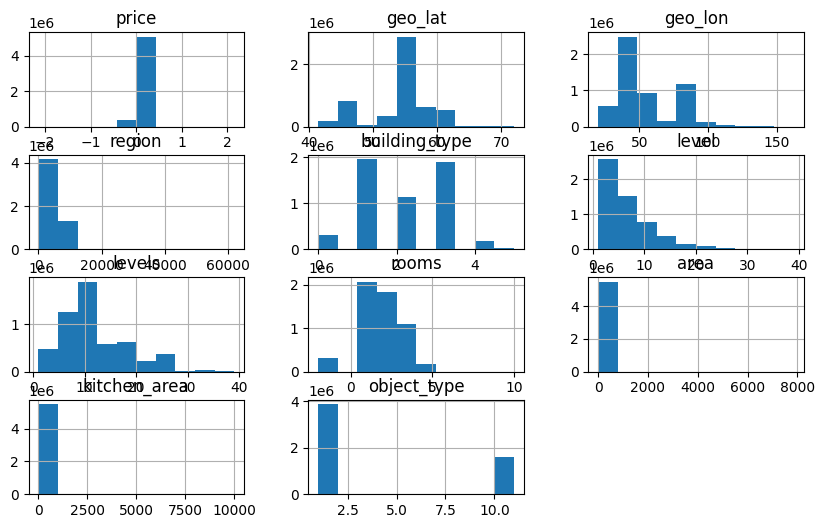

In [44]:
db.hist(figsize=(10, 6))

In [45]:
db.isna().sum()

,0
price,0
date,0
time,0
geo_lat,0
geo_lon,0
region,0
building_type,0
level,0
levels,0
rooms,0


In [46]:
db.duplicated().sum()

np.int64(1523)

In [47]:
db = db.drop_duplicates()
db.shape

(5475483, 13)

In [48]:
db.drop('time', axis=1, inplace=True)
db.object_type = db.object_type.apply(lambda x: 2 if x == 11 else x)
db.rooms = db.rooms.apply(lambda x : 0 if x < 0 else x)
db.price = db.price.abs()

In [49]:
db.loc[db.level > db.levels, 'level'] = db.levels
db['level_to_levels'] = db.level / db.levels

db.drop('level', axis=1, inplace=True)
db.drop("levels", axis=1, inplace=True)

In [50]:
db.date = pd.to_datetime(db.date)
db['year'] = db['date'].dt.year
db['month'] = db['date'].dt.month
db.drop('date', axis=1, inplace=True)

In [51]:
db.head()

,price,geo_lat,geo_lon,region,building_type,rooms,area,kitchen_area,object_type,level_to_levels,year,month
0,6050000,59.806,30.376,2661,1,3,82.600,10.800,1,0.800,2018,2
1,8650000,55.684,37.297,81,3,2,69.100,12.000,1,0.208,2018,2
2,4000000,56.295,44.062,2871,1,3,66.000,10.000,1,0.556,2018,2
3,1850000,44.996,39.075,2843,4,2,38.000,5.000,2,0.750,2018,3
4,5450000,55.919,37.985,81,3,2,60.000,10.000,1,0.929,2018,3


In [52]:
region_name = {
    '2661': 'Санкт-Петербург',
    '3446': 'Ленинградская область',
    '3': 'Москва',
    '81': 'Московская область',
    '2843': 'Краснодарский край',
    '2871': 'Нижегородская область',
    '3230': 'Ростовская область',
    '3106': 'Самарская область',
    '2922': 'Республика Татарстан',
    '2900': 'Ставропольский край',
    '2722': 'Республика Башкортостан',
    '6171': 'Свердловская область',
    '4417': 'Республика Коми',
    '5282': 'Челябинская область',
    '5368': 'Иркутская область',
    '5520': 'Пермский край',
    '6817': 'Алтайский край',
    '9579': 'Республика Бурятия',
    '2604': 'Ярославская область',
    '1010': 'Удмуртская Республика',
    '7793': 'Псковская область',
    '13919': 'Республика Северная Осетия — Алания',
    '2860': 'Кемеровская область',
    '3019': 'Чувашская Республика',
    '4982': 'Республика Марий Эл',
    '9648': 'Кабардино-Балкарская Республика',
    '5241': 'Республика Мордовия',
    '3870': 'Красноярский край',
    '3991': 'Тюменская область',
    '2359': 'Республика Хакасия',
    '9654': 'Новосибирская область',
    '2072': 'Воронежская область',
    '8090': 'Республика Карелия',
    '4007': 'Республика Дагестан',
    '11171': 'Республика Саха (Якутия)',
    '10160': 'Забайкальский край',
    '7873, 6937': 'Республика Крым',
    '2594': 'Кировская область',
    '8509': 'Республика Калмыкия',
    '11416': 'Республика Адыгея',
    '11991': 'Карачаево-Черкесская Республика',
    '5178': 'Республика Тыва',
    '13913': 'Республика Ингушетия',
    '6309': 'Республика Алтай',
    '5952': 'Белгородская область',
    '6543': 'Архангельская область',
    '2880': 'Тверская область',
    '5993': 'Пензенская область',
    '2484': 'Ханты-Мансийский автономный округ',
    '4240': 'Липецкая область',
    '5789': 'Владимирская область',
    '14880': 'Ямало-Ненецкий автономный округ',
    '1491': 'Рязанская область',
    '2885': 'Чеченская Республика',
    '5794': 'Смоленская область',
    '2528': 'Саратовская область',
    '4374': 'Вологодская область',
    '4695': 'Волгоградская область',
    '2328': 'Калужская область',
    '5143': 'Тульская область',
    '2806': 'Тамбовская область',
    '14368': 'Мурманская область',
    '5736': 'Новгородская область',
    '7121': 'Курская область',
    '4086': 'Хабаровский край',
    '821': 'Брянская область',
    '10582': 'Астраханская область',
    '7896': 'Калининградская область',
    '8640': 'Омская область',
    '5703': 'Курганская область',
    '10201': 'Томская область',
    '4249': 'Ульяновская область',
    '3153': 'Оренбургская область',
    '4189': 'Костромская область',
    '2814': 'Орловская область',
    '13098': 'Камчатский край',
    '8894': 'Ивановская область',
    '7929': 'Амурская область',
    '16705': 'Магаданская область',
    '69': 'Еврейская автономная область',
    '4963': 'Приморский край',
    '1901': 'Сахалинская область',
    '61888': 'Ненецкий автономный округ'
}

In [53]:
db['region'] = db.region.astype(str)
db['region_name'] = db['region'].map(region_name)
db.drop('region', axis=1, inplace=True)
db.head()

,price,geo_lat,geo_lon,building_type,rooms,area,kitchen_area,object_type,level_to_levels,year,month,region_name
0,6050000,59.806,30.376,1,3,82.600,10.800,1,0.800,2018,2,Санкт-Петербург
1,8650000,55.684,37.297,3,2,69.100,12.000,1,0.208,2018,2,Московская область
2,4000000,56.295,44.062,1,3,66.000,10.000,1,0.556,2018,2,Нижегородская область
3,1850000,44.996,39.075,4,2,38.000,5.000,2,0.750,2018,3,Краснодарский край
4,5450000,55.919,37.985,3,2,60.000,10.000,1,0.929,2018,3,Московская область


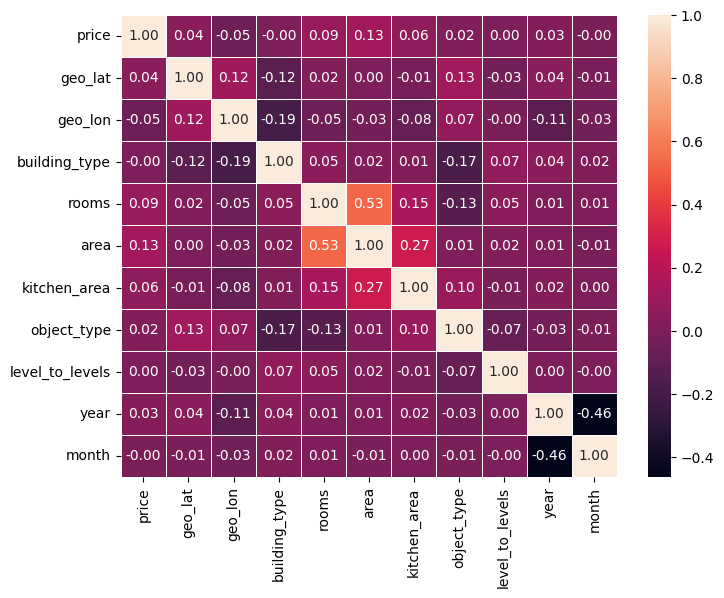

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap(db.corr(numeric_only=True), annot=True, cbar=True, linewidths=.5, fmt= '.2f')
plt.show()

In [55]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
db['enc_reg'] = encoder.fit_transform(db[['region_name']])
db.drop('region_name', axis=1, inplace=True)
db.head()

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,price,geo_lat,geo_lon,building_type,rooms,area,kitchen_area,object_type,level_to_levels,year,month,enc_reg
0,6050000,59.806,30.376,1,3,82.600,10.800,1,0.800,2018,2,62
1,8650000,55.684,37.297,3,2,69.100,12.000,1,0.208,2018,2,30
2,4000000,56.295,44.062,1,3,66.000,10.000,1,0.556,2018,2,33
3,1850000,44.996,39.075,4,2,38.000,5.000,2,0.750,2018,3,22
4,5450000,55.919,37.985,3,2,60.000,10.000,1,0.929,2018,3,30


In [56]:
from sklearn.model_selection import train_test_split
X = db.drop('price', axis=1)
Y = db['price']
feature_names = X.columns
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4380386, 11), (1095097, 11), (4380386,), (1095097,))

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Переходим к обучению моделей

Обучим CatBoostRegressor без подбора гиперпараметров

In [26]:
!pip install catboost
from sklearn.metrics import *
from catboost import CatBoostRegressor, Pool
import numpy as np

CBModel = CatBoostRegressor(iterations=1000, verbose=100)
CBModel.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)])

y_test_pred = CBModel.predict(X_test)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("Relative MAE (% от среднего y_test):",
      mean_absolute_error(y_test, y_test_pred) / np.mean(y_test) * 100, "%")

evals_result = CBModel.get_evals_result()
train_loss = evals_result['learn']['RMSE']
test_loss = evals_result['validation']['RMSE']

Визуализируем процесс обучения

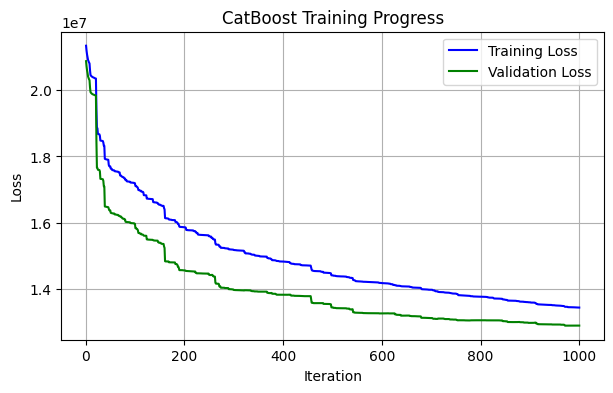

In [ ]:
iterations = np.arange(1, len(train_loss) + 1)

plt.figure(figsize=(7, 4))
plt.plot(iterations, train_loss, label='Training Loss', color='blue')
plt.plot(iterations, test_loss, label='Validation Loss', color='green')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('CatBoost Training Progress')
plt.legend()
plt.grid()
plt.show()

Посмотрим на важность признаков для модели

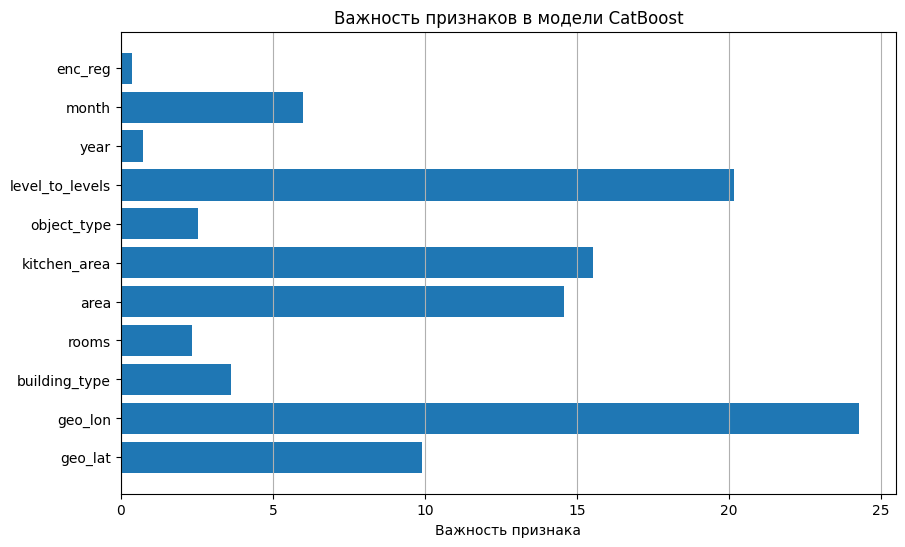

In [ ]:
feature_importance = CBModel.get_feature_importance()
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Важность признака')
plt.title('Важность признаков в модели CatBoost')
plt.grid(axis='x')
plt.show()

Аналогично проверим LightGBM

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import lightgbm as lgb

evals_result = {}
LGBMReg = LGBMRegressor(n_estimators=1000)
LGBMReg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            eval_metric='rmse',
            callbacks=[lgb.record_evaluation(evals_result)])

y_test_pred = LGBMReg.predict(X_test)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("Relative MAE (% от среднего y_test):",
      mean_absolute_error(y_test, y_test_pred) / np.mean(y_test) * 100, "%")

train_loss = evals_result['training']['rmse']
test_loss = evals_result['valid_1']['rmse']

[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.064230
[LightGBM] [Debug] init for col-wise cost 0.000009 seconds, init for row-wise cost 0.453990 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.158203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 4380386, number of used features: 11
[LightGBM] [Info] Start training from score 4655931.455416
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree wi

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Mean Squared Error (MSE): 148824315302687.5
Mean Absolute Error (MAE): 1106740.9945081072
Relative MAE (% от среднего y_test): 23.837829061153606 %


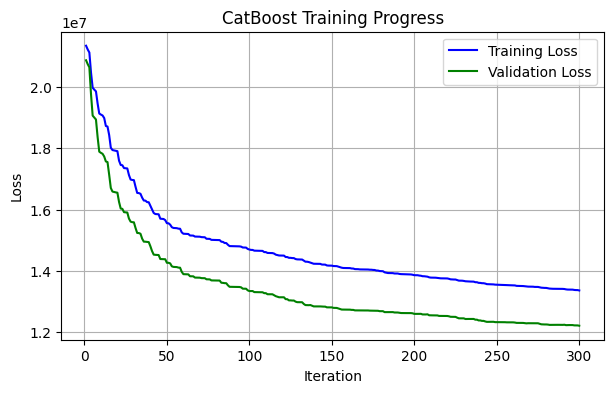

In [ ]:
iterations = np.arange(1, len(train_loss) + 1)

plt.figure(figsize=(7, 4))
plt.plot(iterations, train_loss, label='Training Loss', color='blue')
plt.plot(iterations, test_loss, label='Validation Loss', color='green')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('CatBoost Training Progress')
plt.legend()
plt.grid()
plt.show()

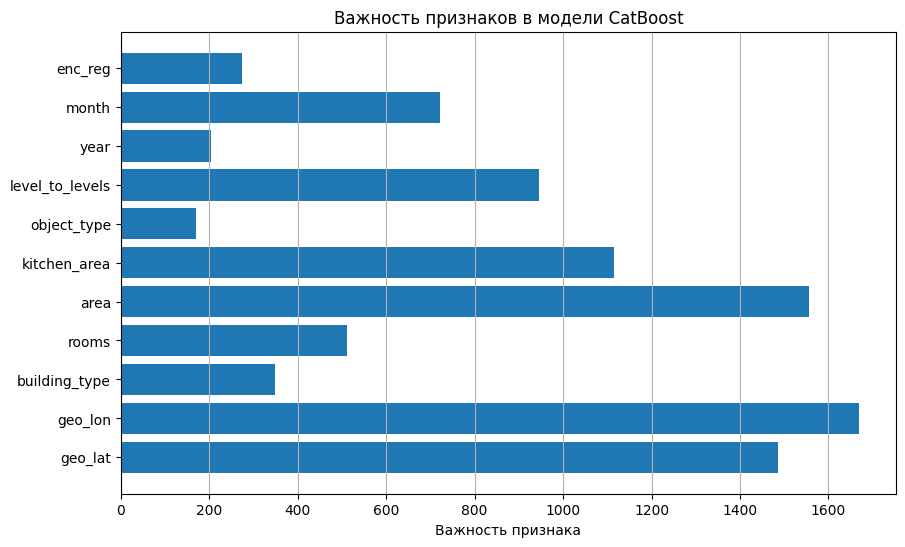

In [ ]:
feature_importance = LGBMReg.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Важность признака')
plt.title('Важность признаков в модели CatBoost')
plt.grid(axis='x')
plt.show()

XGBoost

In [ ]:
import xgboost as xgb

evals_result = {}

# Create DMatrix objects for training and testing data
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # Regression objective
    'eval_metric': 'rmse' # Evaluation metric
}

XGBReg = xgb.train(params, dtrain,
                   num_boost_round=1000,
                   evals=[(dtrain, 'training'), (dtest, 'validation')],
                   evals_result=evals_result,
                   verbose_eval=100)

y_test_pred = XGBReg.predict(dtest)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("Relative MAE (% от среднего y_test):",
      mean_absolute_error(y_test, y_test_pred) / np.mean(y_test) * 100, "%")

train_loss = evals_result['training']['rmse']
test_loss = evals_result['validation']['rmse']

[0]	training-rmse:21052435.67950	validation-rmse:20521633.30588
[100]	training-rmse:14782978.71376	validation-rmse:13842502.86129
[200]	training-rmse:13956638.41614	validation-rmse:13162931.97070
[300]	training-rmse:13517433.89590	validation-rmse:12889060.10881
[400]	training-rmse:13091902.72762	validation-rmse:12704499.81573
[500]	training-rmse:12782223.38360	validation-rmse:12625698.17351
[600]	training-rmse:12507480.82878	validation-rmse:12543306.71024
[700]	training-rmse:12278793.25281	validation-rmse:12517387.47303
[800]	training-rmse:12157899.73825	validation-rmse:12501889.72484
[900]	training-rmse:12023223.45613	validation-rmse:12503771.09764
[999]	training-rmse:11931204.24980	validation-rmse:12502935.59362
Mean Squared Error (MSE): 156323387801600.0
Mean Absolute Error (MAE): 1328716.75
Relative MAE (% от среднего y_test): 28.618911664394442 %


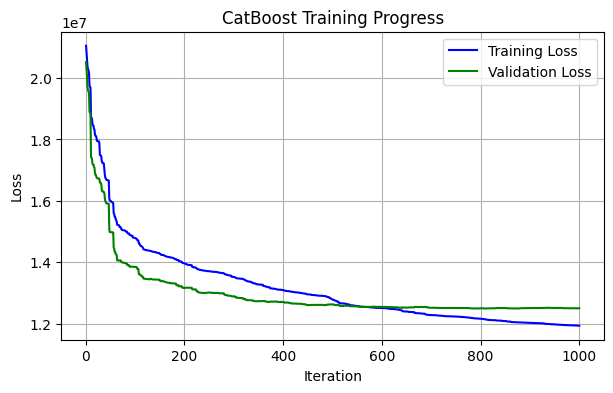

In [ ]:
iterations = np.arange(1, len(train_loss) + 1)

plt.figure(figsize=(7, 4))
plt.plot(iterations, train_loss, label='Training Loss', color='blue')
plt.plot(iterations, test_loss, label='Validation Loss', color='green')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('CatBoost Training Progress')
plt.legend()
plt.grid()
plt.show()

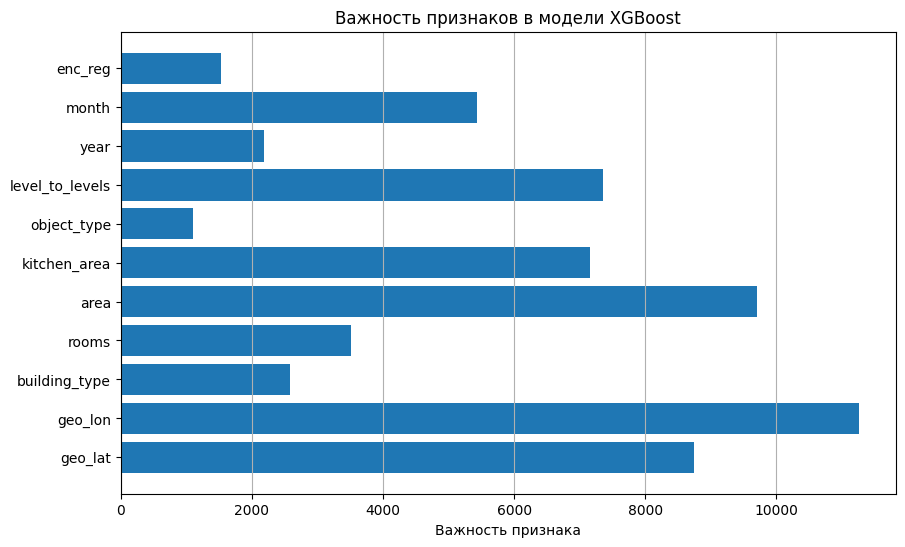

In [ ]:
feature_importance = XGBReg.get_score(importance_type='weight')

feature_importance_list = list(feature_importance.items())
importance_scores = [item[1] for item in feature_importance_list]

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores)
plt.xlabel('Важность признака')
plt.title('Важность признаков в модели XGBoost')
plt.grid(axis='x')
plt.show()

#Подбор гиперпараметров

**Для начала сделаем функцию, которая будет разбивать датасет на батчи для кросс-валидации**

In [58]:
from sklearn.model_selection import KFold


def cross_validate_model(model, X_train, y_train, n_splits=5):
    """
    Performs cross-validation on a given model.

    Args:
        model: The machine learning model to cross-validate.
        X_train: Training features.
        y_train: Training target variable.
        n_splits: Number of folds for cross-validation.

    Returns:
        A dictionary containing the mean and standard deviation of MSE and MAE scores.
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    mse_scores = []
    mae_scores = []

    for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
        print(f"Fold {fold+1}/{n_splits}")
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        model.fit(X_train_fold, y_train_fold)
        y_pred_fold = model.predict(X_val_fold)

        mse = mean_squared_error(y_val_fold, y_pred_fold)
        mae = mean_absolute_error(y_val_fold, y_pred_fold)

        mse_scores.append(mse)
        mae_scores.append(mae)

    return {
        'mean_mse': np.mean(mse_scores),
        'std_mse': np.std(mse_scores),
        'mean_mae': np.mean(mae_scores),
        'std_mae': np.std(mae_scores)
    }

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import numpy as np
import lightgbm as lgb

LGBMReg = LGBMRegressor(random_state=42)

parameters = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [-1, 10, 20],
    'min_child_samples': [20, 50, 100],
    'subsample': [0.8, 1.0]
}


gs = GridSearchCV(LGBMReg,                 # Classifier object to optimize
                  parameters,          # Grid of the hyperparameters
                  scoring='neg_mean_squared_error',  # Using negative MSE for optimization
                  cv=5,
                  n_jobs=-1,
                  return_train_score=True,
                  verbose=True)


# Run Grid Search optimization
gs.fit(X_train, y_train)
print("Best parameters found: ", gs.best_params_)

best_LGBMReg = gs.best_estimator_
y_test_pred = best_LGBMReg.predict(X_test)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("Relative MAE (% от среднего y_test):",
      mean_absolute_error(y_test, y_test_pred) / np.mean(y_test) * 100, "%")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
